# Training e test su...

## Fathed Minnow (no pubchem)

In [1]:
from helper_knn import *

db = pd.read_csv('lc_db_processed.csv').drop(columns = 'Unnamed: 0')

species = pd.read_csv('C:/Users/Simone/Desktop/Utilità tesi magistrale/data/species.txt', sep = '\|', engine = 'python')

fm = species[species['common_name'] == 'Fathead Minnow'][['class', 'tax_order', 'family', 'genus', 'species']].values.ravel()

db_fm = db.loc[(db[['class', 'tax_order', 'family', 'genus', 'species']] == fm).all(axis =1)].copy()

y = np.where(db_fm['conc1_mean'] > 1, 0,1)

numerical = ['atom_number', 'bonds_number','Mol', 'MorganDensity', 'LogP',
            'alone_atom_number', 'doubleBond', 'tripleBond', 'ring_number', 'oh_count', 'MeltingPoint', 'WaterSolubility']

kf = KFold(n_splits=5, shuffle=True, random_state = 5645)
for k in [1,3,5,7,9,11,13,15,17,19,21,31]:
    accs = []
    sens = []
    specs = []
    for train_index, test_index in kf.split(db_fm):
        X_train = db_fm.iloc[train_index]
        X_test = db_fm.iloc[test_index]
        y_train = y[train_index]
        y_test = y[test_index]
        
        minmax = MinMaxScaler()
        minmax.fit(X_train[numerical])
        
        new_train = X_train.copy()
        new_train.loc[:, numerical] = minmax.transform(X_train[numerical])

        new_test = X_test.copy()
        new_test.loc[:, numerical] = minmax.transform(X_test[numerical])
        
        knn = KNeighborsClassifier(n_neighbors = k, n_jobs = -1)
        knn.fit(new_train[numerical], y_train)
        y_pred = knn.predict(new_test[numerical])

        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

        accs.append(accuracy_score(y_test, y_pred))
        sens.append(recall_score(y_test, y_pred))
        specs.append(tn/(tn+fp))
    
    print('K=', k)
    print('Accuracy:', np.mean(accs), 'se:', sem(accs))
    print('Sensitivity:', np.mean(sens), 'se:', sem(sens))
    print('Specificity:', np.mean(specs), 'se:', sem(specs))

K= 1
Accuracy: 0.9310954063604241 se: 0.007781878284644973
Sensitivity: 0.8040004259371045 se: 0.022934155162118382
Specificity: 0.9689407151686371 se: 0.0021196665710280036
K= 3
Accuracy: 0.9180212014134277 se: 0.007833851334768679
Sensitivity: 0.7951374657221637 se: 0.012905819015171644
Specificity: 0.9541845510000788 se: 0.005231614359002529
K= 5
Accuracy: 0.9109540636042404 se: 0.004490553013123255
Sensitivity: 0.7836123540934301 se: 0.012355543000899147
Specificity: 0.9478163203539806 se: 0.0036380341855842824
K= 7
Accuracy: 0.9123674911660778 se: 0.0033800576801605964
Sensitivity: 0.792024385926408 se: 0.004224875451233221
Specificity: 0.9474100343021016 se: 0.0033828573396993368
K= 9
Accuracy: 0.8936395759717314 se: 0.0057900952679059885
Sensitivity: 0.7429642483322885 se: 0.00750226489709269
Specificity: 0.937828985302932 se: 0.004571503045398671
K= 11
Accuracy: 0.8848056537102474 se: 0.008680649114161302
Sensitivity: 0.7018478856708116 se: 0.02184035491211321
Specificity: 0.93

## Fathead Minnow (si pubchem)

In [1]:
from helper_knn import *

db = pd.read_csv('lc_db_processed.csv').drop(columns = 'Unnamed: 0')

db = pd.concat([db,
                pd.DataFrame(pd.DataFrame(db['pubchem2d'].values).\
                             apply(lambda x: x.str.replace('', ' ').str.strip().str.split(' '), 
                                                                        axis = 1)[0].to_list(),
                   columns = ['pub'+ str(i) for i in range(1,882)])],
               axis = 1)

species = pd.read_csv('C:/Users/Simone/Desktop/Utilità tesi magistrale/data/species.txt', sep = '\|', engine = 'python')

fm = species[species['common_name'] == 'Fathead Minnow'][['class', 'tax_order', 'family', 'genus', 'species']].values.ravel()

db_fm = db.loc[(db[['class', 'tax_order', 'family', 'genus', 'species']] == fm).all(axis =1)].copy()

y = np.where(db_fm['conc1_mean'] > 1, 0,1)


categorical = ['test_cas', 'fish', 'smiles', 'pubchem2d', 'conc1_mean', 'obs_duration_mean',
               'conc1_type', 'exposure_type', 'control_type', 'media_type',
               'application_freq_unit', 'species', 'class', 'tax_order', 'family', 'genus']
db_fm.drop(columns = categorical, inplace = True)

numerical = ['atom_number', 'bonds_number','Mol', 'MorganDensity', 'LogP',
            'alone_atom_number', 'doubleBond', 'tripleBond', 'ring_number', 'oh_count', 'MeltingPoint', 'WaterSolubility']

kf = KFold(n_splits=5, shuffle=True, random_state = 5645)
for k in [1,3,5,7,9,11,13,15,17,19,21,31]:
    accs = []
    sens = []
    specs = []
    for train_index, test_index in kf.split(db_fm):
        X_train = db_fm.iloc[train_index]
        X_test = db_fm.iloc[test_index]
        y_train = y[train_index]
        y_test = y[test_index]
        
        minmax = MinMaxScaler()
        minmax.fit(X_train[numerical])
        
        new_train = X_train.copy()
        new_train.loc[:, numerical] = minmax.transform(X_train[numerical])

        new_test = X_test.copy()
        new_test.loc[:, numerical] = minmax.transform(X_test[numerical])
        
        knn = KNeighborsClassifier(n_neighbors = k, n_jobs = -1)
        knn.fit(new_train, y_train)
        y_pred = knn.predict(new_test)

        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

        accs.append(accuracy_score(y_test, y_pred))
        sens.append(recall_score(y_test, y_pred))
        specs.append(tn/(tn+fp))
    
    print('K=', k)
    print('Accuracy:', np.mean(accs), 'se:', sem(accs))
    print('Sensitivity:', np.mean(sens), 'se:', sem(sens))
    print('Specificity:', np.mean(specs), 'se:', sem(specs))

K= 1
Accuracy: 0.9325088339222616 se: 0.005763076477137839
Sensitivity: 0.8151963641953983 se: 0.014217910029877786
Specificity: 0.9666305299454461 se: 0.0037807987432010456
K= 3
Accuracy: 0.914487632508834 se: 0.005199271720693355
Sensitivity: 0.7662567318777287 se: 0.014030997534586347
Specificity: 0.9580559815800991 se: 0.0031531139251897073
K= 5
Accuracy: 0.9 se: 0.003471180689821292
Sensitivity: 0.7084031535780599 se: 0.016433541134838244
Specificity: 0.955641115498941 se: 0.0019169190812560952
K= 7
Accuracy: 0.8957597173144876 se: 0.006017451012694844
Sensitivity: 0.6892408937968287 se: 0.017647184403699973
Specificity: 0.9560927049956917 se: 0.003537954057960044
K= 9
Accuracy: 0.8876325088339223 se: 0.006648370219868123
Sensitivity: 0.6454559221863585 se: 0.02124584789159448
Specificity: 0.9583798270102225 se: 0.0031229369151547517
K= 11
Accuracy: 0.876678445229682 se: 0.00705387447974457
Sensitivity: 0.6032758226937508 se: 0.022919013318692
Specificity: 0.957057094912423 se: 0.

## Rainbow Trout (no pubchem)

In [1]:
from helper_knn import *

db = pd.read_csv('lc_db_processed.csv').drop(columns = 'Unnamed: 0')

species = pd.read_csv('C:/Users/Simone/Desktop/Utilità tesi magistrale/data/species.txt', sep = '\|', engine = 'python')

fm = species[species['common_name'] == 'Rainbow Trout'][['class', 'tax_order', 'family', 'genus', 'species']].values.ravel()

db_fm = db.loc[(db[['class', 'tax_order', 'family', 'genus', 'species']] == fm).all(axis =1)].copy()

y = np.where(db_fm['conc1_mean'] > 1, 0,1)

numerical = ['atom_number', 'bonds_number','Mol', 'MorganDensity', 'LogP',
            'alone_atom_number', 'doubleBond', 'tripleBond', 'ring_number', 'oh_count', 'MeltingPoint', 'WaterSolubility']

kf = KFold(n_splits=5, shuffle=True, random_state = 5645)
for k in [1,3,5,7,9,11,13,15,17,19,21,31]:
    accs = []
    sens = []
    specs = []
    for train_index, test_index in kf.split(db_fm):
        X_train = db_fm.iloc[train_index]
        X_test = db_fm.iloc[test_index]
        y_train = y[train_index]
        y_test = y[test_index]
        
        minmax = MinMaxScaler()
        minmax.fit(X_train[numerical])
        
        new_train = X_train.copy()
        new_train.loc[:, numerical] = minmax.transform(X_train[numerical])

        new_test = X_test.copy()
        new_test.loc[:, numerical] = minmax.transform(X_test[numerical])
        
        knn = KNeighborsClassifier(n_neighbors = k, n_jobs = -1)
        knn.fit(new_train[numerical], y_train)
        y_pred = knn.predict(new_test[numerical])

        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

        accs.append(accuracy_score(y_test, y_pred))
        sens.append(recall_score(y_test, y_pred))
        specs.append(tn/(tn+fp))
    
    print('K=', k)
    print('Accuracy:', np.mean(accs), 'se:', sem(accs))
    print('Sensitivity:', np.mean(sens), 'se:', sem(sens))
    print('Specificity:', np.mean(specs), 'se:', sem(specs))

K= 1
Accuracy: 0.8528624026846705 se: 0.012477651691311849
Sensitivity: 0.8185444582608206 se: 0.013590227260004554
Specificity: 0.878287566686582 se: 0.011688392168057364
K= 3
Accuracy: 0.8436918990703852 se: 0.01187566099109498
Sensitivity: 0.8071749361481239 se: 0.014765781019932837
Specificity: 0.8704935432881834 se: 0.012325293552949798
K= 5
Accuracy: 0.8333269715548981 se: 0.005674648443914373
Sensitivity: 0.7875913566860634 se: 0.003836241023239107
Specificity: 0.8663437465285078 se: 0.006833059088019364
K= 7
Accuracy: 0.8165803850466398 se: 0.006861815812674036
Sensitivity: 0.7589979752849706 se: 0.010563632447894284
Specificity: 0.856721033516231 se: 0.010251451629970794
K= 9
Accuracy: 0.8106011085398924 se: 0.0068848366378144845
Sensitivity: 0.7495451953707117 se: 0.011808796038733959
Specificity: 0.8532019873951088 se: 0.010552434303341277
K= 11
Accuracy: 0.801829011300109 se: 0.008618439934890223
Sensitivity: 0.7396072777226814 se: 0.006646623452999274
Specificity: 0.845779

## Rainbow Trout (si pubchem)

In [2]:
from helper_knn import *

db = pd.read_csv('lc_db_processed.csv').drop(columns = 'Unnamed: 0')

db = pd.concat([db,
                pd.DataFrame(pd.DataFrame(db['pubchem2d'].values).\
                             apply(lambda x: x.str.replace('', ' ').str.strip().str.split(' '), 
                                                                        axis = 1)[0].to_list(),
                   columns = ['pub'+ str(i) for i in range(1,882)])],
               axis = 1)

species = pd.read_csv('C:/Users/Simone/Desktop/Utilità tesi magistrale/data/species.txt', sep = '\|', engine = 'python')

fm = species[species['common_name'] == 'Rainbow Trout'][['class', 'tax_order', 'family', 'genus', 'species']].values.ravel()

db_fm = db.loc[(db[['class', 'tax_order', 'family', 'genus', 'species']] == fm).all(axis =1)].copy()

y = np.where(db_fm['conc1_mean'] > 1, 0,1)

categorical = ['test_cas', 'fish', 'smiles', 'pubchem2d', 'conc1_mean', 'obs_duration_mean',
               'conc1_type', 'exposure_type', 'control_type', 'media_type',
               'application_freq_unit', 'species', 'class', 'tax_order', 'family', 'genus']
db_fm.drop(columns = categorical, inplace = True)

numerical = ['atom_number', 'bonds_number','Mol', 'MorganDensity', 'LogP',
            'alone_atom_number', 'doubleBond', 'tripleBond', 'ring_number', 'oh_count', 'MeltingPoint', 'WaterSolubility']

kf = KFold(n_splits=5, shuffle=True, random_state = 5645)
for k in [1,3,5,7,9,11,13,15,17,19,21,31]:
    accs = []
    sens = []
    specs = []
    for train_index, test_index in kf.split(db_fm):
        X_train = db_fm.iloc[train_index]
        X_test = db_fm.iloc[test_index]
        y_train = y[train_index]
        y_test = y[test_index]
        
        minmax = MinMaxScaler()
        minmax.fit(X_train[numerical])
        
        new_train = X_train.copy()
        new_train.loc[:, numerical] = minmax.transform(X_train[numerical])

        new_test = X_test.copy()
        new_test.loc[:, numerical] = minmax.transform(X_test[numerical])
        
        knn = KNeighborsClassifier(n_neighbors = k, n_jobs = -1)
        knn.fit(new_train, y_train)
        y_pred = knn.predict(new_test)

        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

        accs.append(accuracy_score(y_test, y_pred))
        sens.append(recall_score(y_test, y_pred))
        specs.append(tn/(tn+fp))
    
    print('K=', k)
    print('Accuracy:', np.mean(accs), 'se:', sem(accs))
    print('Sensitivity:', np.mean(sens), 'se:', sem(sens))
    print('Specificity:', np.mean(specs), 'se:', sem(specs))

K= 1
Accuracy: 0.8672233222797432 se: 0.005233482777208244
Sensitivity: 0.8290288563615139 se: 0.006384277101491122
Specificity: 0.8948185735910126 se: 0.004616341595184976
K= 3
Accuracy: 0.860044850537968 se: 0.006846493896878796
Sensitivity: 0.8083496076859058 se: 0.00506959874130901
Specificity: 0.8970779843071707 se: 0.007279901439727985
K= 5
Accuracy: 0.843299059252014 se: 0.007271822476227905
Sensitivity: 0.7814859279783967 se: 0.004440415431081489
Specificity: 0.8872699270570662 se: 0.010562910709368394
K= 7
Accuracy: 0.8229660201509332 se: 0.005660516789364827
Sensitivity: 0.7393594259959752 se: 0.0036537130244250937
Specificity: 0.8837909368678742 se: 0.007066973856052359
K= 9
Accuracy: 0.8082170320713156 se: 0.008408427576566735
Sensitivity: 0.7261099487119648 se: 0.0034719909615501744
Specificity: 0.8677254865769299 se: 0.009967535656538875
K= 11
Accuracy: 0.8034321794657696 se: 0.009680822322217664
Sensitivity: 0.7075667890839636 se: 0.0073313887526082625
Specificity: 0.872

# Training su Fathead Minnow e test su tutte le altre
## Solo chemicals information (si pubchem)

In [1]:
from helper_knn import *

db = pd.read_csv('lc_db_processed.csv').drop(columns = 'Unnamed: 0')

db = pd.concat([db,
                pd.DataFrame(pd.DataFrame(db['pubchem2d'].values).\
                             apply(lambda x: x.str.replace('', ' ').str.strip().str.split(' '), 
                                                                        axis = 1)[0].to_list(),
                   columns = ['pub'+ str(i) for i in range(1,882)])],
               axis = 1)

species = pd.read_csv('C:/Users/Simone/Desktop/Utilità tesi magistrale/data/species.txt', sep = '\|', engine = 'python')

fm = species[species['common_name'] == 'Fathead Minnow'][
    ['class', 'tax_order', 'family', 'genus', 'species']].values.ravel()

X_train = db.loc[(db[
    ['class', 'tax_order', 'family', 'genus', 'species']] == fm).all(axis =1)].copy().reset_index(drop=True)
y_train = np.where(X_train['conc1_mean'] > 1, 0,1)

X_test = db.loc[~(db[
    ['class', 'tax_order', 'family', 'genus', 'species']] == fm).all(axis = 1)].copy().reset_index(drop=True)
y_test = np.where(X_test['conc1_mean'] > 1, 0,1)

categorical = ['test_cas', 'fish', 'smiles', 'pubchem2d', 'conc1_mean', 'obs_duration_mean',
               'conc1_type', 'exposure_type', 'control_type', 'media_type',
               'application_freq_unit', 'species', 'class', 'tax_order', 'family', 'genus']
X_train.drop(columns = categorical, inplace = True)
X_test.drop(columns = categorical, inplace = True)

numerical = ['atom_number', 'bonds_number','Mol', 'MorganDensity', 'LogP',
            'alone_atom_number', 'doubleBond', 'tripleBond', 'ring_number', 'oh_count', 'MeltingPoint', 'WaterSolubility']

minmax = MinMaxScaler()
minmax.fit(X_train[numerical])

new_train = X_train.copy()
new_train.loc[:, numerical] = minmax.transform(X_train[numerical])

new_test = X_test.copy()
new_test.loc[:, numerical] = minmax.transform(X_test[numerical])

metrics = pd.DataFrame(index = ['Acc', 'Sens', 'Spec', 'Prec', 'F1'])
for k in [1,3,5,7,9,11,13,15,17,19,21,31]:

    knn = KNeighborsClassifier(n_neighbors = k, n_jobs = -1)
    knn.fit(new_train, y_train)
    y_pred = knn.predict(new_test)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    metrics = pd.concat([ metrics, pd.DataFrame([accuracy_score(y_test, y_pred), recall_score(y_test, y_pred), tn/(tn+fp),
                                                 precision_score(y_test, y_pred), f1_score(y_test, y_pred)], 
                                                index = ['Acc', 'Sens', 'Spec', 'Prec', 'F1'])], axis = 1)
    
metrics = metrics.T.reset_index(drop=True)
metrics['K'] = pd.Series([1,3,5,7,9,11,13,15,17,19,21,31])

In [4]:
metrics

,Acc,Sens,Spec,Prec,F1,K
0,0.810845,0.698303,0.888639,0.812541,0.751103,1
1,0.800786,0.639604,0.912202,0.834317,0.724099,3
2,0.799630,0.638190,0.911224,0.832472,0.722498,5
3,0.793271,0.622065,0.911615,0.829498,0.710960,7
4,0.799919,0.663083,0.894505,0.812901,0.730389,9
5,0.790149,0.642857,0.891963,0.804425,0.714623,11
6,0.780437,0.619802,0.891474,0.797888,0.697660,13
7,0.776911,0.613154,0.890106,0.794101,0.691995,15
8,0.768297,0.594908,0.888150,0.786168,0.677295,17
9,0.765985,0.570721,0.900958,0.799326,0.665951,19


Text(0.5, 1.0, 'KNN Table 2: Fathead Minnow')

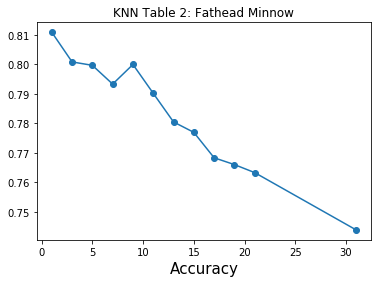

In [5]:
import matplotlib.pyplot as plt

plt.plot(metrics['K'], metrics['Acc'], '-o')
plt.xlabel('K', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.title('KNN Table 2: Fathead Minnow')

# Training su Rainbow Trout e test su tutte le altre
## Solo chemicals information (si pubchem)

Text(0.5, 1.0, 'KNN Table 2: Rainbow Trout')

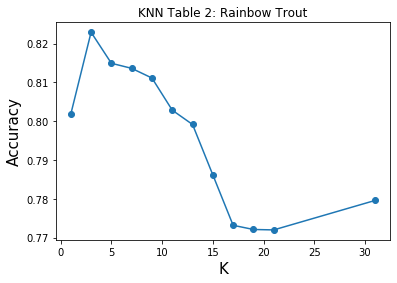

In [2]:
from helper_knn import *

db = pd.read_csv('lc_db_processed.csv').drop(columns = 'Unnamed: 0')

db = pd.concat([db,
                pd.DataFrame(pd.DataFrame(db['pubchem2d'].values).\
                             apply(lambda x: x.str.replace('', ' ').str.strip().str.split(' '), 
                                                                        axis = 1)[0].to_list(),
                   columns = ['pub'+ str(i) for i in range(1,882)])],
               axis = 1)

species = pd.read_csv('C:/Users/Simone/Desktop/Utilità tesi magistrale/data/species.txt', sep = '\|', engine = 'python')

fm = species[species['common_name'] == 'Rainbow Trout'][
    ['class', 'tax_order', 'family', 'genus', 'species']].values.ravel()

X_train = db.loc[(db[
    ['class', 'tax_order', 'family', 'genus', 'species']] == fm).all(axis =1)].copy().reset_index(drop=True)
y_train = np.where(X_train['conc1_mean'] > 1, 0,1)

X_test = db.loc[~(db[
    ['class', 'tax_order', 'family', 'genus', 'species']] == fm).all(axis = 1)].copy().reset_index(drop=True)
y_test = np.where(X_test['conc1_mean'] > 1, 0,1)

categorical = ['test_cas', 'fish', 'smiles', 'pubchem2d', 'conc1_mean', 'obs_duration_mean',
               'conc1_type', 'exposure_type', 'control_type', 'media_type',
               'application_freq_unit', 'species', 'class', 'tax_order', 'family', 'genus']
X_train.drop(columns = categorical, inplace = True)
X_test.drop(columns = categorical, inplace = True)

numerical = ['atom_number', 'bonds_number','Mol', 'MorganDensity', 'LogP',
            'alone_atom_number', 'doubleBond', 'tripleBond', 'ring_number', 'oh_count', 'MeltingPoint', 'WaterSolubility']


minmax = MinMaxScaler()
minmax.fit(X_train[numerical])

new_train = X_train.copy()
new_train.loc[:, numerical] = minmax.transform(X_train[numerical])

new_test = X_test.copy()
new_test.loc[:, numerical] = minmax.transform(X_test[numerical])

metrics = pd.DataFrame(index = ['Acc', 'Sens', 'Spec', 'Prec', 'F1'])

for k in [1,3,5,7,9,11,13,15,17,19,21,31]:

    knn = KNeighborsClassifier(n_neighbors = k, n_jobs = -1)
    knn.fit(new_train, y_train)
    y_pred = knn.predict(new_test)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    metrics = pd.concat([ metrics, pd.DataFrame([accuracy_score(y_test, y_pred), recall_score(y_test, y_pred), tn/(tn+fp),
                                                 precision_score(y_test, y_pred), f1_score(y_test, y_pred)], 
                                                index = ['Acc', 'Sens', 'Spec', 'Prec', 'F1'])], axis = 1)
    
metrics = metrics.T.reset_index(drop=True)
metrics['K'] = pd.Series([1,3,5,7,9,11,13,15,17,19,21,31])

import matplotlib.pyplot as plt

plt.plot(metrics['K'], metrics['Acc'], '-o')
plt.xlabel('K', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.title('KNN Table 2: Rainbow Trout')

In [3]:
metrics

,Acc,Sens,Spec,Prec,F1,K
0,0.801816,0.857186,0.768235,0.691655,0.765575,1
1,0.822928,0.849068,0.807075,0.727460,0.783574,3
2,0.814926,0.828473,0.806710,0.722186,0.771687,5
3,0.813621,0.822760,0.808078,0.722222,0.769220,7
4,0.811124,0.805171,0.814734,0.724959,0.762963,9
5,0.802838,0.799008,0.805160,0.713231,0.753687,11
6,0.799149,0.784125,0.808260,0.712666,0.746690,13
7,0.786152,0.769393,0.796317,0.696137,0.730934,15
8,0.773156,0.746392,0.789387,0.682474,0.713004,17
9,0.772077,0.744438,0.788840,0.681343,0.711494,19
